In [205]:
import main as vb
import numpy as np
import importlib
import matplotlib.pyplot as plt
importlib.reload(vb)

<module 'main' from 'c:\\Users\\user\\Documents\\codes_MVA\\Bayesian ML github\\bayesian_project\\main.py'>

# Data generation

In [206]:
n, p, s = 100, 200, 20

theta_generative = 10*np.ones(p)
theta_generative[s:] = 0
X = np.random.normal(0, 1, size=(n, p))
Y = X @ theta_generative


In [ ]:
theta_generative

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

# Laplace prior Slabs

In [209]:
# initialize
mu_0 = vb.mu_0(X, Y)
sigma_0 = 2*np.random.random(p)
gamma_0 = np.random.random(p)

mu_laplace, sigma_laplace, gamma_laplace = vb.variational_laplace(X, Y, sigma_0, gamma_0, mu_0, a0=1, b0=p, lamb=1, eps=1e-4, max_it=500)


c:\Users\user\Documents\codes_MVA\Bayesian ML github\bayesian_project\main.py:21: RuntimeWarning: invalid value encountered in log
  g += - np.log(sigma_i)
c:\Users\user\Documents\codes_MVA\Bayesian ML github\bayesian_project\main.py:21: RuntimeWarning: invalid value encountered in log
  g += - np.log(sigma_i)
c:\Users\user\Documents\codes_MVA\Bayesian ML github\bayesian_project\main.py:21: RuntimeWarning: invalid value encountered in log
  g += - np.log(sigma_i)
c:\Users\user\Documents\codes_MVA\Bayesian ML github\bayesian_project\main.py:19: RuntimeWarning: divide by zero encountered in true_divide
  g += lamb * mu[i] * sigma_i * np.sqrt(2/np.pi) * np.exp(-mu[i]**2/(2*sigma_i**2))
c:\Users\user\Documents\codes_MVA\Bayesian ML github\bayesian_project\main.py:20: RuntimeWarning: divide by zero encountered in true_divide
  g += lamb * mu[i] * (1 - norm.cdf(mu[i]/sigma_i))
c:\Users\user\Documents\codes_MVA\Bayesian ML github\bayesian_project\main.py:21: RuntimeWarning: divide by zero en

0.2372860311832152


c:\Users\user\Documents\codes_MVA\Bayesian ML github\bayesian_project\main.py:21: RuntimeWarning: invalid value encountered in log
  g += - np.log(sigma_i)


KeyboardInterrupt: 

In [195]:
counts_laplace = np.unique(gamma_laplace == 1, return_counts=True)
counts_laplace

(array([False,  True]), array([ 66, 134], dtype=int64))

In [196]:
theta_laplace = gamma_laplace * np.random.normal(mu_laplace, sigma_laplace)
results_laplace = X @ theta_laplace

In [197]:
results_laplace[:10]

array([  4.18881831,   8.38328977, -18.5241439 ,  11.04526253,
       -49.36191119,  35.83327254,  18.89882763,  53.351292  ,
       -92.91006251,   1.84804113])

In [198]:
Y[:10]

array([  2.72241986,  11.95601273, -19.46636089,  10.97927316,
       -48.31554061,  35.6452206 ,  18.90225994,  52.62281834,
       -91.47830902,   3.01453972])

# Gaussian prior Slabs

In [199]:
# initialize
mu_0 = vb.mu_0(X, Y)
sigma_0 = 10*np.random.random(p)
gamma_0 = np.random.random(p)

mu_gaussian, sigma_gaussian, gamma_gaussian = vb.variational_gaussian(X, Y, sigma_0, gamma_0, mu_0, a0=1, b0=p, lamb=1, eps=1e-4, max_it=500)

  1%|          | 3/500 [00:00<00:20, 24.57it/s]

0.48972760952181926
0.6447705214884187
0.576357194561496
0.6267716501902939


  2%|▏         | 9/500 [00:00<00:25, 19.15it/s]

0.15178543880470594
0.013373684836408616
0.0020917299579851843
0.003351217489076864


  3%|▎         | 13/500 [00:00<00:25, 18.81it/s]

0.008179470228637176
0.21819856416522626
0.38923095150228537
0.08169961391393563


  3%|▎         | 17/500 [00:00<00:27, 17.26it/s]

0.1267669787829725
0.3108786925745617
0.3226468971288468
0.34005713451619946


  4%|▍         | 21/500 [00:01<00:27, 17.48it/s]

0.21579081197564798
0.04115535831168872
0.0640165618986277
0.13460512188961454


  5%|▌         | 25/500 [00:01<00:27, 17.27it/s]

0.3255254725258213
0.1364884323151872
0.13252035450385838
0.3391954315047793


  6%|▌         | 29/500 [00:01<00:26, 17.48it/s]

0.005536084858322788
0.021814677192103605
0.033723186780835274
0.058016255210216625


  7%|▋         | 33/500 [00:01<00:27, 16.97it/s]

0.12004543877120938
0.30093300948589696
0.13745175574391152
0.38280503202563654


  8%|▊         | 38/500 [00:02<00:25, 17.93it/s]

0.13879880365078806
0.3174802561934159
0.15004810937313365
0.281193771524121
0.1347440835301371


  8%|▊         | 42/500 [00:02<00:26, 17.48it/s]

0.3304273903985264
0.42748341014116287
0.32256964253955295
0.12319717727184587


  9%|▉         | 44/500 [00:02<00:28, 15.92it/s]

0.43249102873568473
0.04469044220835053
0.1261706107464995


 10%|▉         | 48/500 [00:02<00:30, 14.67it/s]

0.2893412727694401
0.08482544393639413
0.03985721806487086
0.05448391770203236


 10%|█         | 50/500 [00:02<00:31, 14.38it/s]

0.0653207174923291
0.10709831067647613


 11%|█         | 54/500 [00:03<00:33, 13.38it/s]

0.2029662788700405
0.30746724737020314
0.4067908248280976


 11%|█         | 56/500 [00:03<00:34, 13.03it/s]

0.08729482300403273
0.17928250394030143
0.3457010850862176


 12%|█▏        | 58/500 [00:03<00:35, 12.51it/s]

0.21798571466482308
0.37296877848181526
0.41141863898756764


 13%|█▎        | 64/500 [00:04<00:33, 13.19it/s]

0.06637686067430265
0.036889957807993576
0.04757337019946749
0.12555832115585122


 14%|█▎        | 68/500 [00:04<00:30, 14.39it/s]

0.31630016658956306
0.18282578305776104
0.31175706461008057
0.418926361261003


 14%|█▍        | 72/500 [00:04<00:28, 14.81it/s]

0.1642017350075723
0.09629345116937583
0.12321210224293311
0.18230612378740912


 15%|█▌        | 76/500 [00:04<00:27, 15.20it/s]

0.18338829472324847
0.0025265232857814256
0.007193627395893762
0.01089987695798847


 16%|█▌        | 80/500 [00:05<00:26, 15.75it/s]

0.01658355461357549
0.026013965840407473
0.04183261141782668
0.07292221297033372


 16%|█▋        | 82/500 [00:05<00:27, 15.33it/s]

0.14618928622255975
0.3005732724112292
0.11439401473848931


 17%|█▋        | 86/500 [00:05<00:27, 15.13it/s]

0.2684861371774223
0.28408840956093956
0.0015440652981196894
0.004679964784571182


 18%|█▊        | 90/500 [00:05<00:27, 14.91it/s]

0.009369516091943423
0.014771933006663924
0.023830753899477863
0.03952236668651356


 19%|█▉        | 94/500 [00:06<00:28, 14.47it/s]

0.07205068282382654
0.15442079751094906
0.3283125460490217


 19%|█▉        | 94/500 [00:06<00:26, 15.35it/s]

0.00025339455435973313


In [200]:
counts_gaussian = np.unique(gamma_gaussian == 1, return_counts=True)
counts_gaussian

(array([False,  True]), array([ 81, 119], dtype=int64))

In [201]:
theta_gaussian = gamma_gaussian * np.random.normal(mu_gaussian, sigma_gaussian)
results_gaussian = X @ theta_gaussian

# Comparison

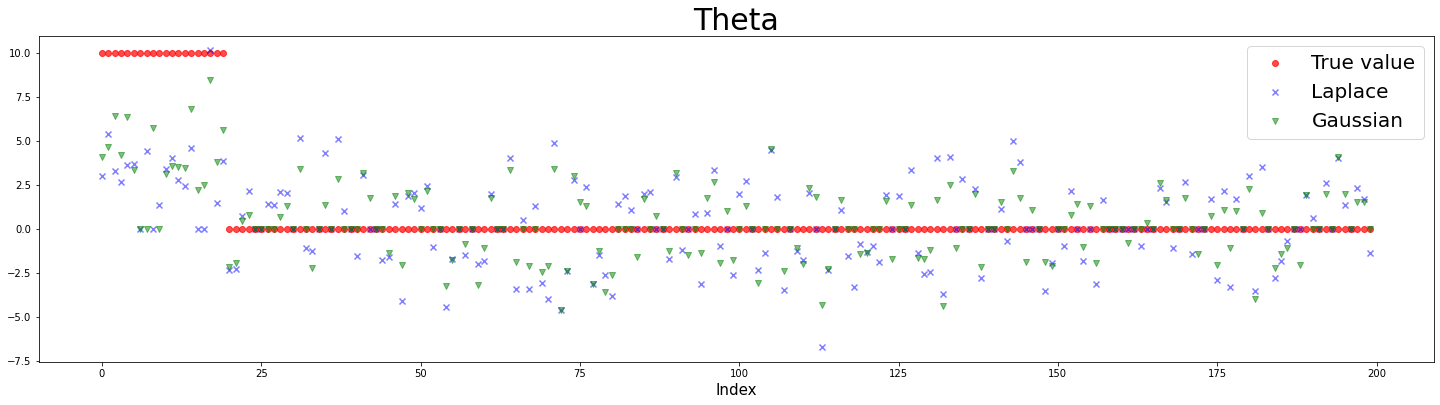

In [202]:
plt.figure(figsize=(25,6))
plt.scatter(np.arange(len(theta_generative)), theta_generative, color='red', marker='o', alpha=0.7, label='True value')
plt.scatter(np.arange(len(theta_laplace)), theta_laplace, color='blue', marker='x', alpha=0.5, label='Laplace')
plt.scatter(np.arange(len(theta_gaussian)), theta_gaussian, color='green', marker='v', alpha=0.5, label='Gaussian')
plt.legend(fontsize=20)
plt.title('Theta', size=30)
plt.xlabel('Index',size=15)

plt.show()

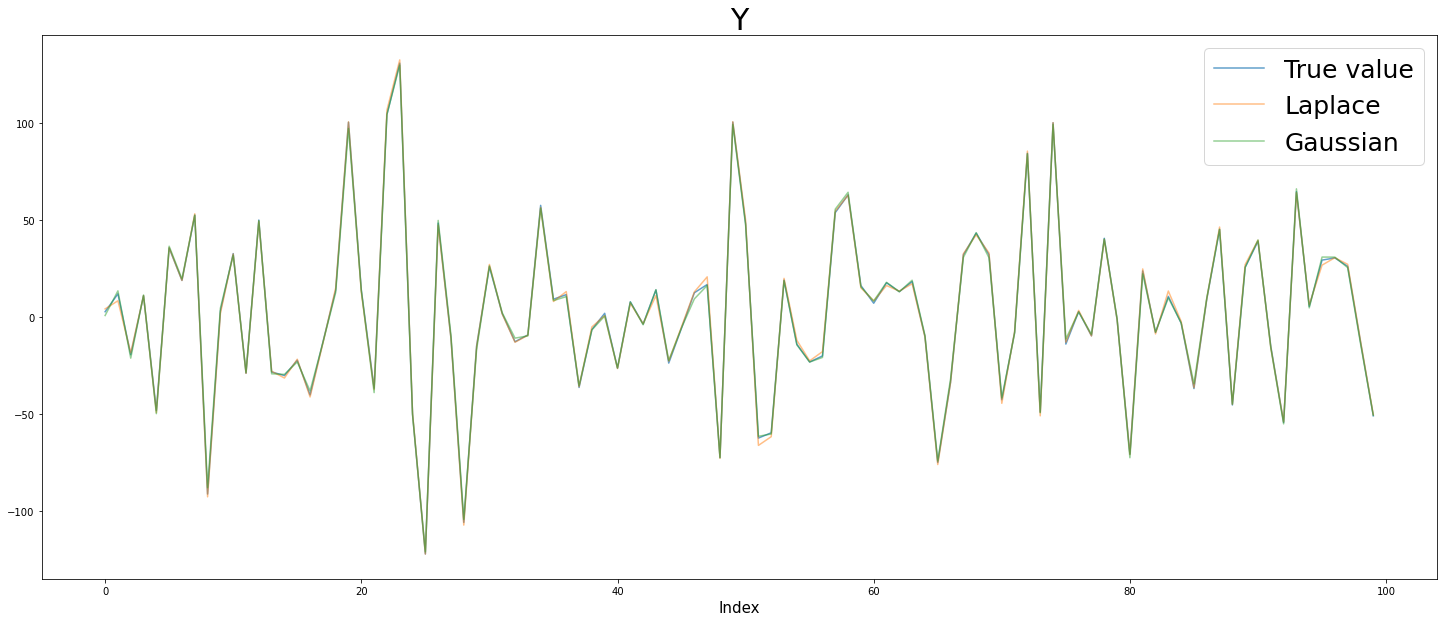

In [203]:
plt.figure(figsize=(25,10))
plt.plot(Y, alpha=0.7, label='True value')
plt.plot(results_laplace, alpha=0.5, label='Laplace')
plt.plot(results_gaussian, alpha=0.5, label='Gaussian')
plt.legend(fontsize=25)
plt.title('Y', size=30)
plt.xlabel('Index',size=15)

plt.show()

$\implies$ Hard to distinguish

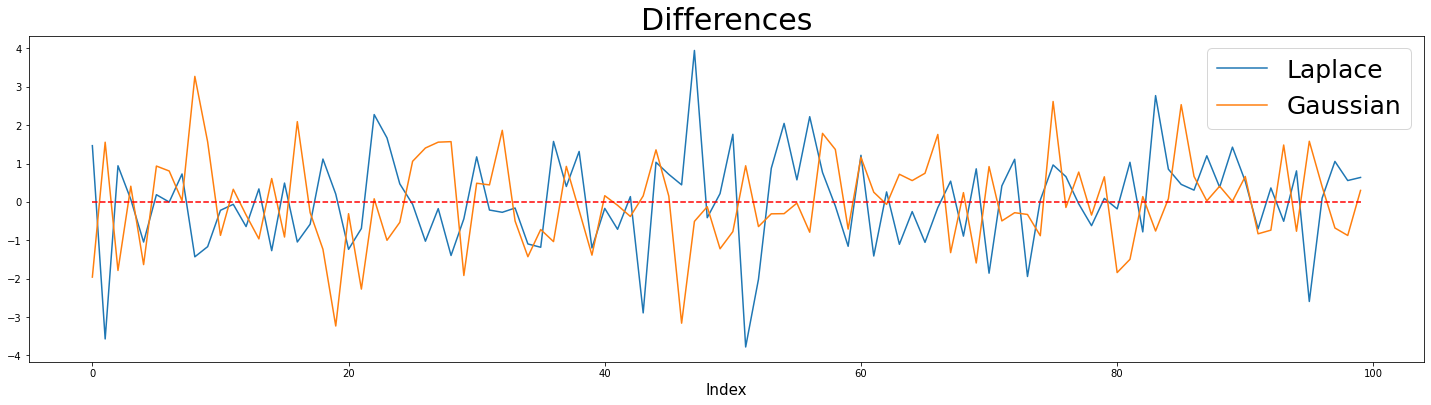

In [204]:
plt.figure(figsize=(25,6))
#plt.plot(Y, color='red', alpha=0.7, label='True value')
plt.plot(results_laplace - Y, label='Laplace')
plt.plot(results_gaussian - Y, label='Gaussian')
plt.plot(range(len(results_gaussian)), np.zeros(len(results_gaussian)), '--', color='red')
plt.legend(fontsize=25)
plt.title('Differences', size=30)
plt.xlabel('Index',size=15)

plt.show()

In [184]:
Y[:15]

array([-11.48276354,  14.21912847,  -4.76611253,  22.38835706,
        19.38103247,  24.68474308, -42.55529531,   4.31161498,
        51.78134979, -54.1623914 ,  57.12689072,  76.3421674 ,
        18.77110462,   2.31222793,  32.77567279])

In [185]:
results_laplace[:15]

array([-10.69947318,  12.47830073,  -5.29145648,  21.13180869,
        19.00758805,  25.32146358, -42.37224506,   4.73587536,
        52.40218714, -53.82205039,  57.60419388,  75.44251549,
        18.49642919,   2.49801188,  32.54506793])

In [186]:
results_laplace[:15]

array([-10.69947318,  12.47830073,  -5.29145648,  21.13180869,
        19.00758805,  25.32146358, -42.37224506,   4.73587536,
        52.40218714, -53.82205039,  57.60419388,  75.44251549,
        18.49642919,   2.49801188,  32.54506793])